In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
housing = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\data\nx_train.csv',index_col=0)


In [4]:
neigh_dict = {'NoRidge':'NoRidge_NridgHt_Veenker_StoneBr', 
             'NridgHt':'NoRidge_NridgHt_Veenker_StoneBr',
              'Veenker':'NoRidge_NridgHt_Veenker_StoneBr',
              'StoneBr':'NoRidge_NridgHt_Veenker_StoneBr',
              
              'Somerst':'Somerst_Timber',
              'Timber':'Neighborhood_Somerst_Timber',
              
              'ClearCr':'ClearCr_CollgCr_Crawfor',
              'CollgCr':'ClearCr_CollgCr_Crawfor',
              'Crawfor':'ClearCr_CollgCr_Crawfor',
              
              'Greens':'Greens_SawyerW_Blmngtn',
              'SawyerW':'Greens_SawyerW_Blmngtn',
              'Blmngtn':'Greens_SawyerW_Blmngtn',
              
              'Gilbert':'Gilbert_NWAmes',
              'NWAmes':'Gilbert_NWAmes',
              
              'Mitchel':'Mitchel_NPkVill',
              'NPkVill':'Mitchel_NPkVill',
              
              'NAmes':'NAmes_SWISU_Sawyer',
              'SWISU':'NAmes_SWISU_Sawyer',
              'Sawyer':'NAmes_SWISU_Sawyer',
              
              'BrkSide':'BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'Edwards':'BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'Blueste':'BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'OldTown':'BrkSide_Edwards_Blueste_OldTown_IDOTRR',
              'IDOTRR':'BrkSide_Edwards_Blueste_OldTown_IDOTRR'
             }

In [5]:
housing['Neighborhood_mapped'] = housing['Neighborhood'].map(neigh_dict)

In [6]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        'Cumulative_Frequency': datax.values.cumsum(),
        'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    #return(datay.set_index(variable_))
    return(datay)

In [7]:
proc_freq(housing,'Neighborhood_mapped')

,Neighborhood_mapped,Frequency,Percent,Cumulative_Frequency,Cumulative_Percent
0,BrkSide_Edwards_Blueste_OldTown_IDOTRR,382,21.98,382,21.98
1,ClearCr_CollgCr_Crawfor,271,15.59,653,37.57
2,Gilbert_NWAmes,177,10.18,830,47.76
3,Greens_SawyerW_Blmngtn,96,5.52,926,53.28
4,Mitchel_NPkVill,85,4.89,1011,58.17
5,NAmes_SWISU_Sawyer,417,23.99,1428,82.16
6,Neighborhood_Somerst_Timber,32,1.84,1460,84.00
7,NoRidge_NridgHt_Veenker_StoneBr,180,10.36,1640,94.36
8,Somerst_Timber,98,5.64,1738,100.00


In [9]:
medians = housing.groupby('Neighborhood_mapped')['SalePrice'].median().reset_index()
medians = medians.sort_values(by=['SalePrice'], ascending=False).reset_index()
med_list = list(medians.Neighborhood_mapped)

[Text(0, 0, 'NoRidge_NridgHt_Veenker_StoneBr'),
 Text(1, 0, 'Somerst_Timber'),
 Text(2, 0, 'Neighborhood_Somerst_Timber'),
 Text(3, 0, 'ClearCr_CollgCr_Crawfor'),
 Text(4, 0, 'Greens_SawyerW_Blmngtn'),
 Text(5, 0, 'Gilbert_NWAmes'),
 Text(6, 0, 'Mitchel_NPkVill'),
 Text(7, 0, 'NAmes_SWISU_Sawyer'),
 Text(8, 0, 'BrkSide_Edwards_Blueste_OldTown_IDOTRR')]

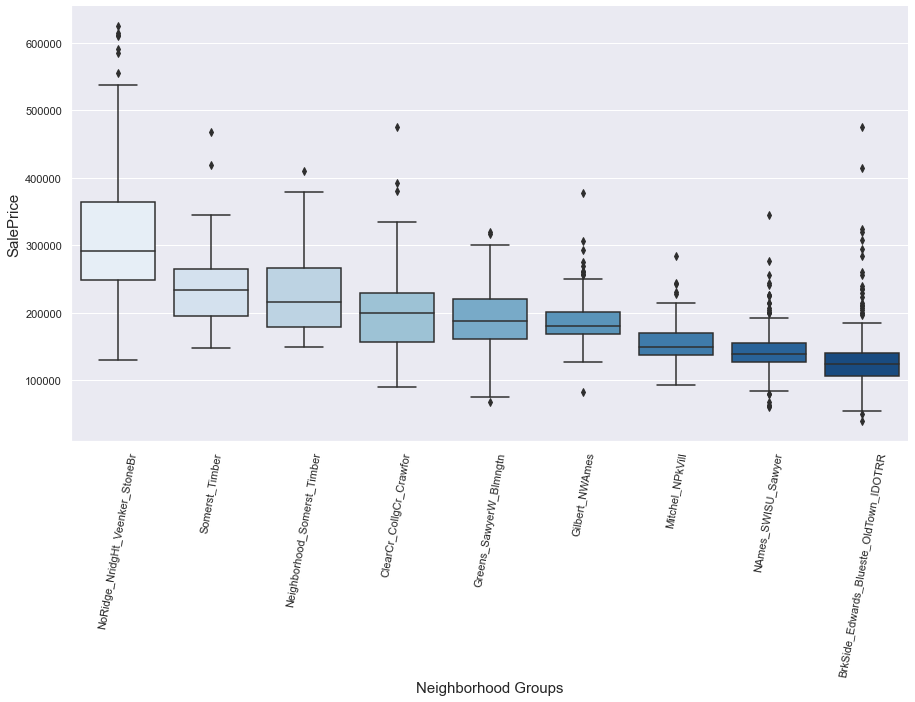

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Neighborhood_mapped', y='SalePrice', data=housing, palette='Blues',order=med_list,hue_order=med_list)

box.set_xlabel("Neighborhood Groups",fontsize=15)
box.set_ylabel("SalePrice",fontsize=15)
                 
#hue="smoker", palette=["m", "g"],
#sns.despine(offset=10,trim=False)
sns.despine()
# box.set_title('Number Of Words In Pet Narrative',fontsize=20)
box.set_xticklabels(box.get_xticklabels(),rotation = 80)



In [16]:
df = housing[['Neighborhood_mapped','SalePrice']]
df.sort_values

,Neighborhood_mapped,SalePrice
1232,Gilbert_NWAmes,162900
2381,NAmes_SWISU_Sawyer,133000
810,Gilbert_NWAmes,189000
863,NoRidge_NridgHt_Veenker_StoneBr,290000
1346,BrkSide_Edwards_Blueste_OldTown_IDOTRR,143000


In [ ]:
df2 

In [39]:
data = {'Brand': ['HH','TT','FF','AA'],
        'Price': [22000,25000,27000,35000],
        'Year': [2015,2013,2018,2018]
        }
 
df = pd.DataFrame(data, columns=['Brand','Price','Year'])

# sort Brand in an ascending order
df.sort_values(by=['Brand'], inplace=True)

print (df)

  Brand  Price  Year
3    AA  35000  2018
2    FF  27000  2018
0    HH  22000  2015
1    TT  25000  2013


In [37]:
grouped.shape

(1784,)

In [31]:
housing.shape

(1784, 250)

In [42]:
# sns.boxplot(data=df_sorted_desc)
# plt.xlabel("Neighborhood Group", size=18)
# plt.ylabel("Sale Price", size=18)